In [1]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


# 样本类别不平衡

此notebook将使用。。。。。。。。。

## 样本类别不平衡的定义

   样本类别不平衡指的是分类任务中不同类别的训练样例数目差别很大（一般明显大于1:1）的情况。

## 样本类别不平衡的影响

### 数据准备

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from collections import Counter
from imp import reload
#reload(utils)
from utils import *

/var/folders/3p/y6vfvq5x1nbbksfsznp5xyy40000gn/T/ipykernel_35107/2758945526.py:10: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload


加载数据集

In [3]:
iris = datasets.load_iris()
pd.DataFrame(iris.data, columns=iris.feature_names).head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
print(f"原始数据类别比例：\n{pd.Series(iris.target).value_counts()}")

原始数据类别比例：
0    50
1    50
2    50
dtype: int64


In [5]:
X = iris.data[0:100, [0, 1]]
Y = iris.target[0:100]
print(f"此处使用的数据类别比例：\n{pd.Series(Y).value_counts()}")

此处使用的数据类别比例：
0    50
1    50
dtype: int64


In [6]:
##划分数据集，完整的训练集80%，测试集20%
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.5, random_state=0)
print(f'完整的训练集类别比例：\n{pd.Series(Ytrain).value_counts()}')
print(f'测试集类别比例：\n{pd.Series(Ytest).value_counts()}')

完整的训练集类别比例：
1    26
0    24
dtype: int64
测试集类别比例：
0    26
1    24
dtype: int64


In [7]:
##z-score标准化
normalizer = StandardScaler()
Xtrain = normalizer.fit_transform(X=Xtrain)
Xtest = normalizer.transform(X=Xtest)

原始数据集包含8个特征，但因为想要可视化模型决策边界，所以对数据进行PCA，保留两个主要成分。

### 样本类别平衡时

In [8]:
##使用标准的逻辑回归
clf = LogisticRegression('l2')
clf.fit(X=Xtrain, y=Ytrain)#训练
evaluate(Ytrain, clf.predict_proba(Xtrain), 'training', threshold=0.5)#在训练集上测试
print('='*50)
evaluate(Ytest, clf.predict_proba(Xtest), 'test', threshold=0.5)#在测试集上测试

training set 的性能指标:
Accuracy            1.000000
Sensitivity         1.000000
Specificity         1.000000
Precision           1.000000
NPV                 1.000000
AUC                 1.000000
F1                  1.000000
Threshold by ROC    0.638312
dtype: float64
{'TP': 26, 'TN': 24, 'FP': 0, 'FN': 0}

training set的混淆矩阵:
                 Label True  Label False
Predicted True           26            0
Predicted False           0           24
test set 的性能指标:
Accuracy       0.980000
Sensitivity    1.000000
Specificity    0.961538
Precision      0.960000
NPV            1.000000
AUC            1.000000
F1             0.979592
dtype: float64
{'TP': 24, 'TN': 25, 'FP': 1, 'FN': 0}

test set的混淆矩阵:
                 Label True  Label False
Predicted True           24            1
Predicted False           0           25


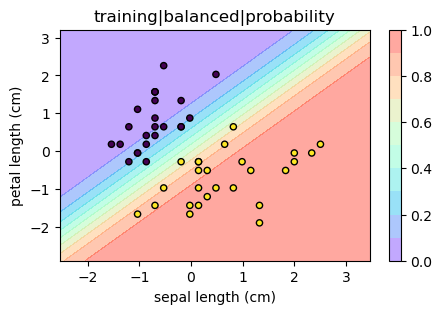

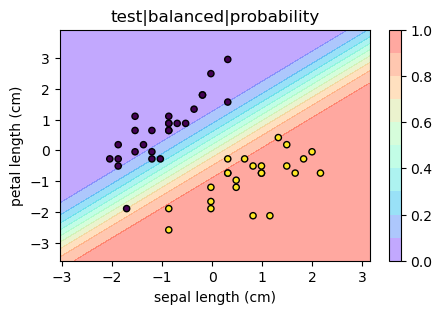

In [9]:
##画出训决策边界
show_decision_region_proba(X=Xtrain, Y=Ytrain, clf=clf, title='training|balanced|probability')
show_decision_region_proba(X=Xtest, Y=Ytest, clf=clf, title='test|balanced|probability')

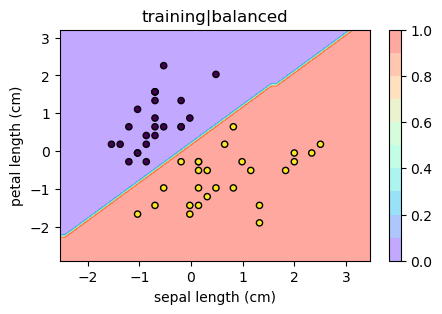

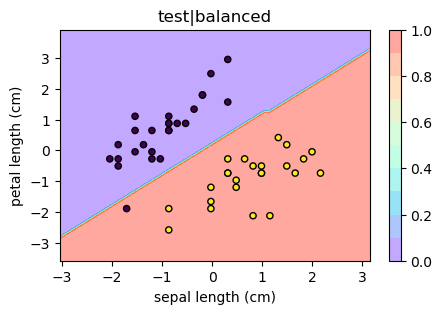

In [10]:
show_decision_region(X=Xtrain, Y=Ytrain, clf=clf, title='training|balanced', threshold=0.5)
show_decision_region(X=Xtest, Y=Ytest, clf=clf, title='test|balanced', threshold=0.5)

### 正例:负例 $\approx$ 10:1时 

In [11]:
n_negative_10_1 = sum(Ytrain) // 10 + 1#计算负例的数量
#从训练集的负例中随机抽取n_negative个
np.random.seed(0)
index_10_1 = np.random.choice(np.arange(0, len(Ytrain)-sum(Ytrain), 1), size=n_negative_10_1, replace=False)
Xtrain_10_1 = np.concatenate([Xtrain[Ytrain==1], Xtrain[Ytrain==0][index_10_1]])
Ytrain_10_1 = np.concatenate([Ytrain[Ytrain==1], Ytrain[Ytrain==0][index_10_1]])
Xtrain_10_1.shape, Ytrain_10_1.shape

((29, 2), (29,))

In [12]:
clf_10_1 = LogisticRegression()
clf_10_1.fit(X=Xtrain_10_1, y=Ytrain_10_1)#训练
evaluate(Ytrain_10_1, clf.predict_proba(Xtrain_10_1), 'training', threshold=0.5)#在训练集上测试
print('='*50)
evaluate(Ytest, clf_10_1.predict_proba(Xtest), 'test', threshold=0.5)#在测试集上测试

training set 的性能指标:
Accuracy            1.000000
Sensitivity         1.000000
Specificity         1.000000
Precision           1.000000
NPV                 1.000000
AUC                 1.000000
F1                  1.000000
Threshold by ROC    0.638312
dtype: float64
{'TP': 26, 'TN': 3, 'FP': 0, 'FN': 0}

training set的混淆矩阵:
                 Label True  Label False
Predicted True           26            0
Predicted False           0            3
test set 的性能指标:
Accuracy       0.880000
Sensitivity    1.000000
Specificity    0.769231
Precision      0.800000
NPV            1.000000
AUC            1.000000
F1             0.888889
dtype: float64
{'TP': 24, 'TN': 20, 'FP': 6, 'FN': 0}

test set的混淆矩阵:
                 Label True  Label False
Predicted True           24            6
Predicted False           0           20


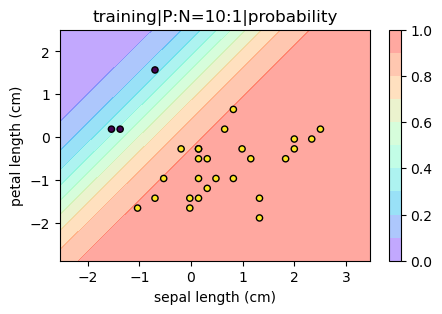

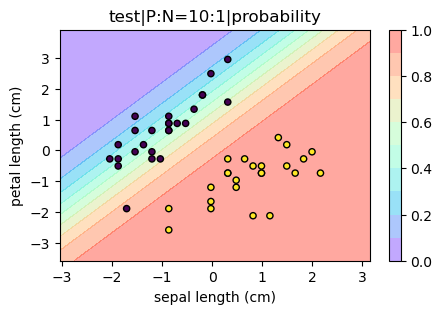

In [13]:
##画出训决策边界
show_decision_region_proba(X=Xtrain_10_1, Y=Ytrain_10_1, clf=clf_10_1, title='training|P:N=10:1|probability')
show_decision_region_proba(X=Xtest, Y=Ytest, clf=clf_10_1, title='test|P:N=10:1|probability')

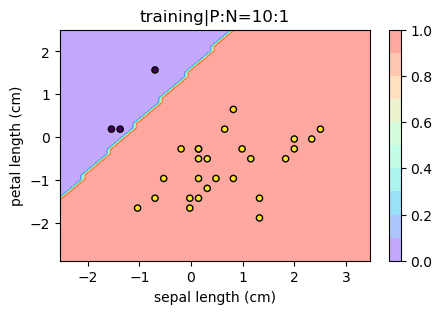

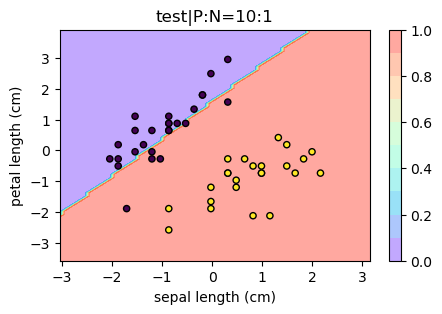

In [14]:
show_decision_region(X=Xtrain_10_1, Y=Ytrain_10_1, clf=clf_10_1, title='training|P:N=10:1', threshold=0.5)
show_decision_region(X=Xtest, Y=Ytest, clf=clf_10_1, title='test|P:N=10:1', threshold=0.5)

### 正例:负例 $\approx$ 1:10时 

In [15]:
n_positive_1_10 = (len(Ytrain) - sum(Ytrain)) // 10 + 1#计算负例的数量
#从训练集的负例中随机抽取n_negative个
np.random.seed(0)
index_1_10 = np.random.choice(np.arange(0, sum(Ytrain), 1), size=n_positive_1_10, replace=False)
Xtrain_1_10 = np.concatenate([Xtrain[Ytrain==0], Xtrain[Ytrain==1][index_1_10]])
Ytrain_1_10 = np.concatenate([Ytrain[Ytrain==0], Ytrain[Ytrain==1][index_1_10]])
Xtrain_1_10.shape, Ytrain_1_10.shape

((27, 2), (27,))

In [16]:
clf_1_10 = LogisticRegression('l2')
clf_1_10.fit(X=Xtrain_1_10, y=Ytrain_1_10)
evaluate(Ytrain_1_10, clf_1_10.predict_proba(Xtrain_1_10), 'training', threshold=0.5)#在训练集上测试
print('='*50)
evaluate(Ytest, clf_1_10.predict_proba(Xtest), 'test', threshold=0.5)#在测试集上测试

training set 的性能指标:
Accuracy            0.962963
Sensitivity         0.666667
Specificity         1.000000
Precision           1.000000
NPV                 0.960000
AUC                 1.000000
F1                  0.800000
Threshold by ROC    0.314379
dtype: float64
{'TP': 2, 'TN': 24, 'FP': 0, 'FN': 1}

training set的混淆矩阵:
                 Label True  Label False
Predicted True            2            0
Predicted False           1           24
test set 的性能指标:
Accuracy       0.800000
Sensitivity    0.583333
Specificity    1.000000
Precision      1.000000
NPV            0.722222
AUC            1.000000
F1             0.736842
dtype: float64
{'TP': 14, 'TN': 26, 'FP': 0, 'FN': 10}

test set的混淆矩阵:
                 Label True  Label False
Predicted True           14            0
Predicted False          10           26


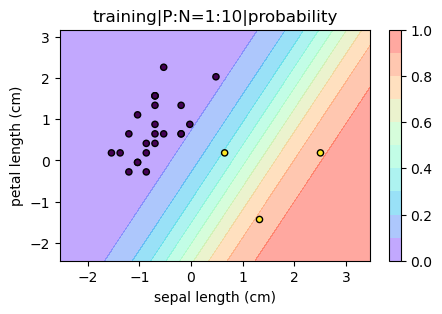

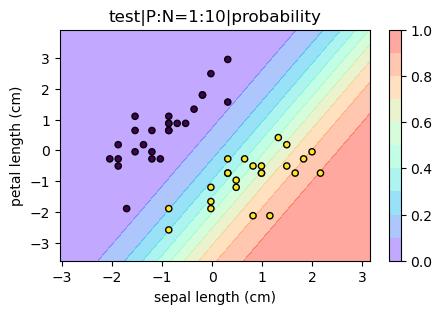

In [17]:
##画出训决策边界
show_decision_region_proba(X=Xtrain_1_10, Y=Ytrain_1_10, clf=clf_1_10, title='training|P:N=1:10|probability')
show_decision_region_proba(X=Xtest, Y=Ytest, clf=clf_1_10, title='test|P:N=1:10|probability')

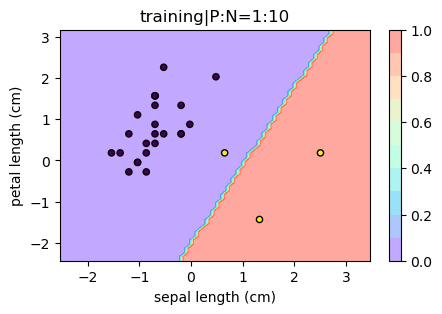

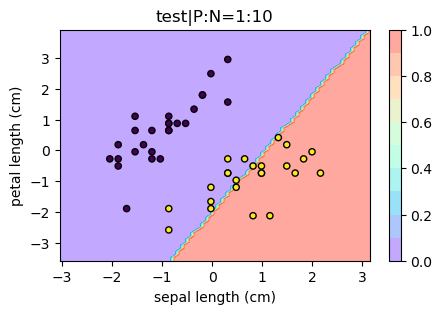

In [18]:
show_decision_region(X=Xtrain_1_10, Y=Ytrain_1_10, clf=clf_1_10, title='training|P:N=1:10', threshold=0.5)
show_decision_region(X=Xtest, Y=Ytest, clf=clf_1_10, title='test|P:N=1:10', threshold=0.5)

## 样本类别不平衡的处理方法 

### 数据层面

#### 过采样

增加少数类别的样本量，使正负样本达到均衡。

##### 随机过采样

对少数类样本随机抽样，直到类别比例达到目标。
+ 优点：
    1. 被过采样的都是真实样本，并未引入“错误样本”，不增加信息熵。
+ 缺点：
    1. 可能重复选取了某类样本，导致对此类别样本的过拟合。
    2. 不适用与少数类样本过于少的情况。在这种情况下，随机过采样到的样本大部分都是一样的。
+ 适用场景：
    1. 少数类并没有比多数类少太多的情况。

以正例:负例 $\approx$ 1:10为例。（因为我们遇到的实际问题中，很容易出现阳性样本较少的情况。）

In [19]:
from imblearn.over_sampling import RandomOverSampler#导入imblearn的随机过采样器
ros = RandomOverSampler(random_state=0, sampling_strategy={1:10})#实例化，可以改变sampling_strategy设置
Xtrain_1_10_ros, Ytrain_1_10_ros = ros.fit_resample(Xtrain_1_10, Ytrain_1_10)
print(f'随机过采样前：{Counter(Ytrain_1_10)}')
print(f'随机过采样后：{Counter(Ytrain_1_10_ros)}')

随机过采样前：Counter({0: 24, 1: 3})
随机过采样后：Counter({0: 24, 1: 10})


In [20]:
clf_1_10_ros = LogisticRegression('l2')
clf_1_10_ros.fit(X=Xtrain_1_10_ros, y=Ytrain_1_10_ros)
evaluate(Ytrain_1_10_ros, clf_1_10_ros.predict_proba(Xtrain_1_10_ros), 'training', threshold=0.5)#在训练集上测试
print('='*50)
evaluate(Ytest, clf_1_10_ros.predict_proba(Xtest), 'test', threshold=0.5)#在测试集上测试

training set 的性能指标:
Accuracy            1.000000
Sensitivity         1.000000
Specificity         1.000000
Precision           1.000000
NPV                 1.000000
AUC                 1.000000
F1                  1.000000
Threshold by ROC    0.617988
dtype: float64
{'TP': 10, 'TN': 24, 'FP': 0, 'FN': 0}

training set的混淆矩阵:
                 Label True  Label False
Predicted True           10            0
Predicted False           0           24
test set 的性能指标:
Accuracy       0.980000
Sensitivity    0.958333
Specificity    1.000000
Precision      1.000000
NPV            0.962963
AUC            1.000000
F1             0.978723
dtype: float64
{'TP': 23, 'TN': 26, 'FP': 0, 'FN': 1}

test set的混淆矩阵:
                 Label True  Label False
Predicted True           23            0
Predicted False           1           26


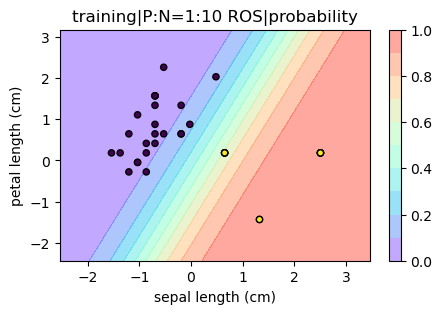

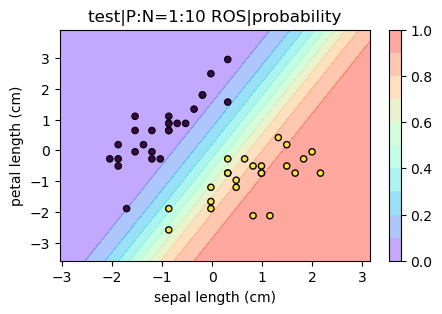

In [21]:
##画出训决策边界
show_decision_region_proba(X=Xtrain_1_10_ros, Y=Ytrain_1_10_ros, clf=clf_1_10_ros,
                           title='training|P:N=1:10 ROS|probability')
show_decision_region_proba(X=Xtest, Y=Ytest, clf=clf_1_10_ros,
                           title='test|P:N=1:10 ROS|probability')

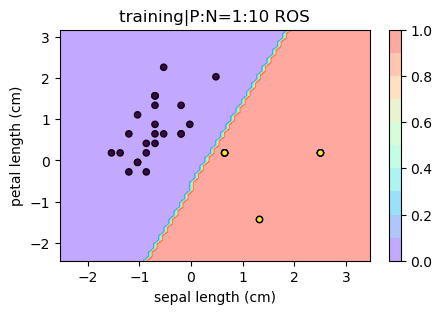

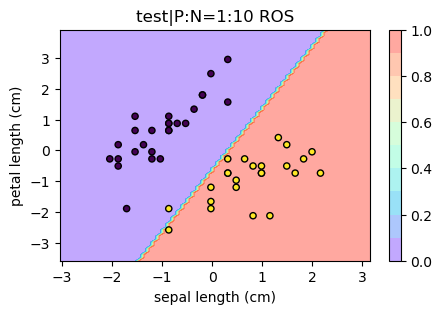

In [22]:
show_decision_region(X=Xtrain_1_10_ros, Y=Ytrain_1_10_ros, clf=clf_1_10_ros,
                     title='training|P:N=1:10 ROS', threshold=0.5)
show_decision_region(X=Xtest, Y=Ytest, clf=clf_1_10_ros,
                     title='test|P:N=1:10 ROS', threshold=0.5)

##### SMOTE

SMOTE算法示例如下图所示：

<img src="./fig/SMOTE.png" style="margin: 0 auto" width="500"/>


+ 优点：
    1. 不会造成某类样本的重复选取。
+ 缺点：
    1. 相当于生成了新的数据，引入了不存在的样本。
    2. 比较容易出现过拟合和高方差的问题。
+ 注意：
    1. SMOTE算法要求输入的数据都是数值类型，且不存在缺失值。即数据要经过缺失值处理才能使用SMOTE算法。
    2. SMOTE算法寻找临近的点时（步骤3），相当于在使用KNN算法，KNN基于距离度量，所以数据要在标准化之后才可以使用SMOTE算法。

以正例:负例 $\approx$ 1:10为例。（因为我们遇到的实际问题中，很容易出现阳性样本较少的情况。）

In [23]:
from imblearn.over_sampling import SMOTE#导入imblearn的SMOTE过采样器
smote = SMOTE(random_state=0, sampling_strategy={1:10}, k_neighbors=2)
Xtrain_1_10_smote, Ytrain_1_10_smote = smote.fit_resample(X=Xtrain_1_10, y=Ytrain_1_10)
print(f'随机过采样前：{Counter(Ytrain_1_10)}')
print(f'随机过采样后：{Counter(Ytrain_1_10_smote)}')

随机过采样前：Counter({0: 24, 1: 3})
随机过采样后：Counter({0: 24, 1: 10})


In [24]:
clf_1_10_smote = LogisticRegression('l2')
clf_1_10_smote.fit(X=Xtrain_1_10_smote, y=Ytrain_1_10_smote)
evaluate(Ytrain_1_10_smote, clf_1_10_smote.predict_proba(Xtrain_1_10_smote), 'training', threshold=0.5)#在训练集上测试
print('='*50)
evaluate(Ytest, clf_1_10_smote.predict_proba(Xtest), 'test', threshold=0.5)#在测试集上测试

training set 的性能指标:
Accuracy            1.000000
Sensitivity         1.000000
Specificity         1.000000
Precision           1.000000
NPV                 1.000000
AUC                 1.000000
F1                  1.000000
Threshold by ROC    0.586553
dtype: float64
{'TP': 10, 'TN': 24, 'FP': 0, 'FN': 0}

training set的混淆矩阵:
                 Label True  Label False
Predicted True           10            0
Predicted False           0           24
test set 的性能指标:
Accuracy       0.980000
Sensitivity    0.958333
Specificity    1.000000
Precision      1.000000
NPV            0.962963
AUC            1.000000
F1             0.978723
dtype: float64
{'TP': 23, 'TN': 26, 'FP': 0, 'FN': 1}

test set的混淆矩阵:
                 Label True  Label False
Predicted True           23            0
Predicted False           1           26


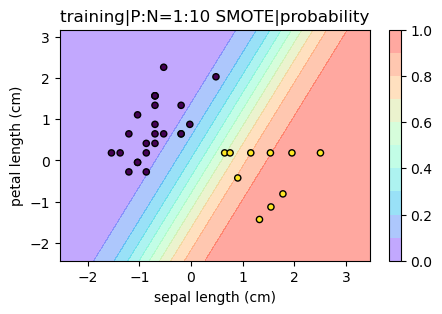

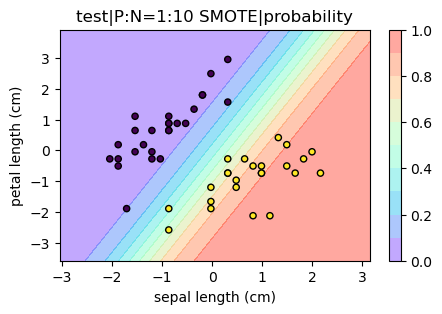

In [25]:
##画出训决策边界
show_decision_region_proba(X=Xtrain_1_10_smote, Y=Ytrain_1_10_smote, clf=clf_1_10_smote,
                           title='training|P:N=1:10 SMOTE|probability')
show_decision_region_proba(X=Xtest, Y=Ytest, clf=clf_1_10_ros,
                           title='test|P:N=1:10 SMOTE|probability')

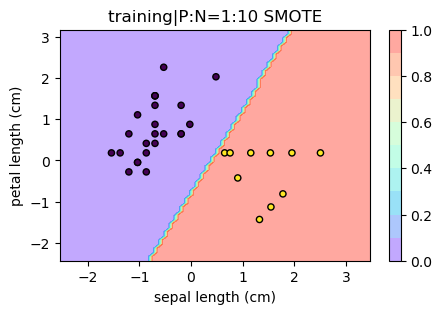

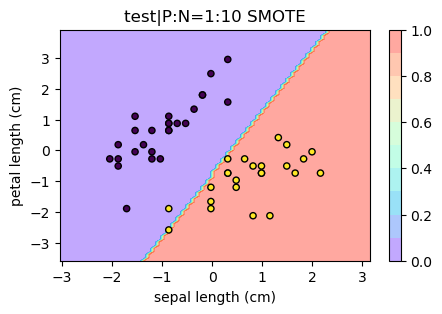

In [26]:
show_decision_region(X=Xtrain_1_10_smote, Y=Ytrain_1_10_smote, clf=clf_1_10_smote,
                     title='training|P:N=1:10 SMOTE', threshold=0.5)
show_decision_region(X=Xtest, Y=Ytest, clf=clf_1_10_smote,
                     title='test|P:N=1:10 SMOTE', threshold=0.5)

上述展示的是最朴素的SMOTE算法，除此之外，还有：
+ BorderlineSMOTE：仅在那些靠近类别边界的样本上应用SMOTE。这样可以减少在类别内部生成的合成样本数量，减少可能引入的噪音。
+ ADASYN（Adaptive Synthetic Sampling Approach for Imbalanced Learning）：核心思想是为少数类样本生成更多的合成样本，特别是在那些难以正确分类的区域。是使用密度分布来确定每个少数类样本产生多少数量的合成数据的。
+ SVMSMOTE：使用支持向量机（SVM）来确定对少数类样本合成新样本最有价值的区域。其核心思想是利用SVM的边界决策特性来识别少数类样本与多数类样本之间的边界，然后在这些关键区域增加新的合成少数类样本。

具体可以参考：https://www.heywhale.com/mw/project/65bcb423e33ab6bc1d8d9526

#### 欠采样

##### 随机欠采样

对多数类样本随机抽样，直到类别比例达到目标。
+ 优点：
    1. 不涉及样本的重复选择；不引入“错误样本”，不增加信息熵，。
+ 缺点：
    1. 可能会因为丢弃了多数类的一些信息导致多数类欠拟合。
    2. 可能会因为总体数据量变少导致总体欠拟合。
+ 适用场景：
    1. 少数类的样本量本身已经很大且多数类样本量没有多太多的情况。

##### Tomek Link

#### 欠采样和过采样的结合

### 算法层面

#### 代价敏感学习

##### 一些算法中的参数可以直接设置错误的权重

##### 调整阈值

#### Focal Loss？？？？